# 🧪 Beginner Notebook – FairFrame Challenge

This notebook provides a basic example of exploratory analysis of synthetic loan data. You need to build on it. 
Your goal is to identify potential group-level disparities (e.g., based on gender, caste, or religion) in loan approvals.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/loan_data.csv")
df.head()


,user_id,gender,caste,religion,age,income,accent_score,loan_score,approved
0,U000,Male,SC/ST,Other,41,65247,54.84,72.80,1
1,U001,Female,OBC,Hindu,52,92752,96.98,71.51,1
2,U002,Male,SC/ST,Hindu,43,86573,77.37,52.68,0
3,U003,Male,SC/ST,Hindu,53,89101,63.78,66.90,1
4,U004,Male,OBC,Other,23,56646,64.51,84.00,1


In [3]:
# Basic Overview
df.describe(include='all')
df['approved'].value_counts(normalize=True)


approved
1    0.82
0    0.18
Name: proportion, dtype: float64

In [6]:
# Group-Level Approval Rates
group_cols = ['gender', 'caste', 'religion']
for col in group_cols:
    print(f"\nApproval rate by {col}")
    print(df.groupby(col)['approved'].mean())



Approval rate by gender
gender
Female    0.839286
Male      0.795455
Name: approved, dtype: float64

Approval rate by caste
caste
General    0.846154
OBC        0.880000
SC/ST      0.695652
Name: approved, dtype: float64

Approval rate by religion
religion
Christian    1.000000
Hindu        0.830189
Muslim       0.680000
Other        0.916667
Name: approved, dtype: float64


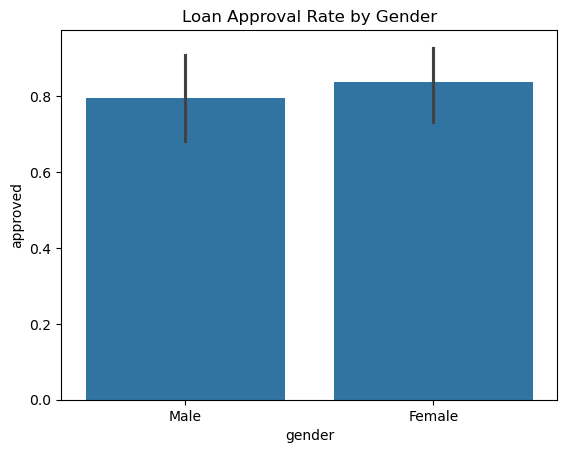

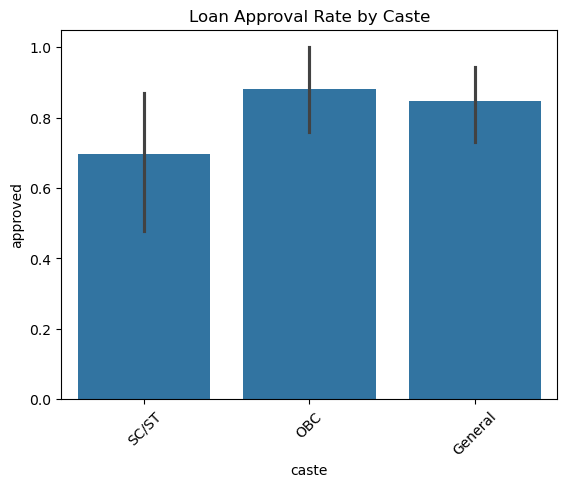

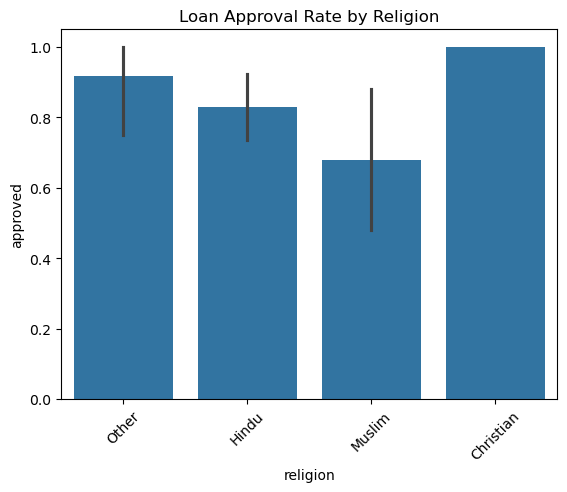

In [8]:
# Visualizations
sns.barplot(x='gender', y='approved', data=df)
plt.title("Loan Approval Rate by Gender")
plt.show()

sns.barplot(x='caste', y='approved', data=df)
plt.title("Loan Approval Rate by Caste")
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='religion', y='approved', data=df)
plt.title("Loan Approval Rate by Religion")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Optional: Disparate Impact Ratio (Sex)
approval_rate = df.groupby('gender')['approved'].mean()
di_ratio = approval_rate.min() / approval_rate.max()
print(f"Disparate Impact Ratio (Sex): {di_ratio:.2f}")


Disparate Impact Ratio (Sex): 0.95


# ✍️ Summary

In your final submission, briefly summarize:

- Which group(s) appeared to have lower approval rates?
- Are there any group disparities that could indicate unfair bias?
- What further data would help you clarify your findings?

This analysis is intended as a first step toward identifying potential fairness concerns in the loan approval system.
